# Алгоритмы минимизации

В этом разделе мы научимся численно решать задачу минимизации произвольной функции с помощью библиотеки `scipy`. Рассмотрим ее основные функции для решения задач минимизации, поговорим об особенностях их использования и в конце решим две прикладные задачи. 

#### Задача минимизации
Под задачей минимизации будем понимать поиск минимального (максимального) значения функции на области ее определения

### Поиск минимума одномерной функции
Для начала рассмотрим пример задачи минимизации для одномерной функции вида 
$$f(x) = (x - 0.5)^2, x \in [-10, 10]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('retina')
mpl.style.use('seaborn-white')
warnings.filterwarnings('ignore')

In [2]:
dx = 0.001
x = np.arange(-10, 10, dx)
f0 = lambda x: (x - 0.5)**2

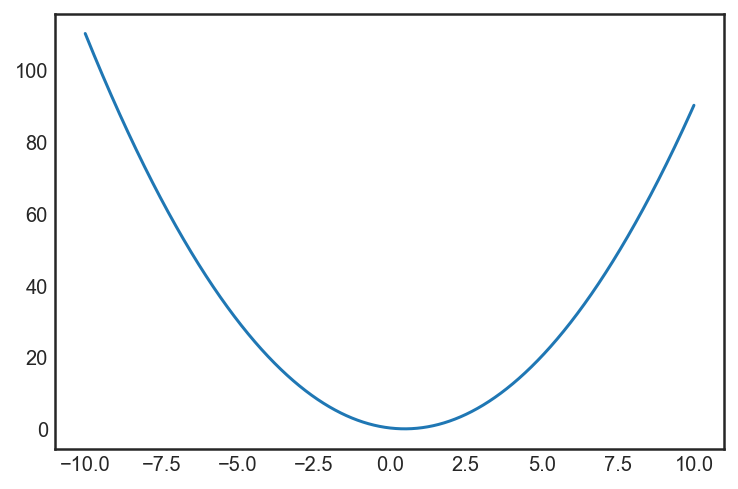

In [3]:
plt.plot(x, f0(x));

По виду функции сразу можно сказать, что минимум будет в точке $x = 0.5$, что и видно на графике.

Теперь найдем положение минимума при помощи функции `minimize` из библиотеки `scipy`. Первым аргументом для функции `minimize` является функция, которую нужно минимизировать, вторым - начальная точка, с которой будет стартовать алгоритм минимизации.

In [4]:
from scipy.optimize import minimize
result = minimize(f0, x0=1)

Посмотрим на выдачу результата минимизации. Важными параметрами для нас являются `fun`, который показывает значение минимизируемой функции в точке минимума; `success` - булевый параметр, который показывает, сошелся алгоритм или нет; `x` - самый важный параметр, который показывает ответ - точку минимума.

In [5]:
result

      fun: 1.3877787807814457e-17
 hess_inv: array([[1]])
      jac: array([2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.5])

Рассмотрим теперь более сложный пример одномерной функции с несколькими экстремумами:
$$ f(x) = x^2 \cdot (1 - 0.1 x^2) \cdot e^{-0.1 x^2}$$

In [6]:
f = lambda x: x**2 * ( 1 - 0.1 * (x) **2 )* np.exp(- 0.1 * (x)**2)

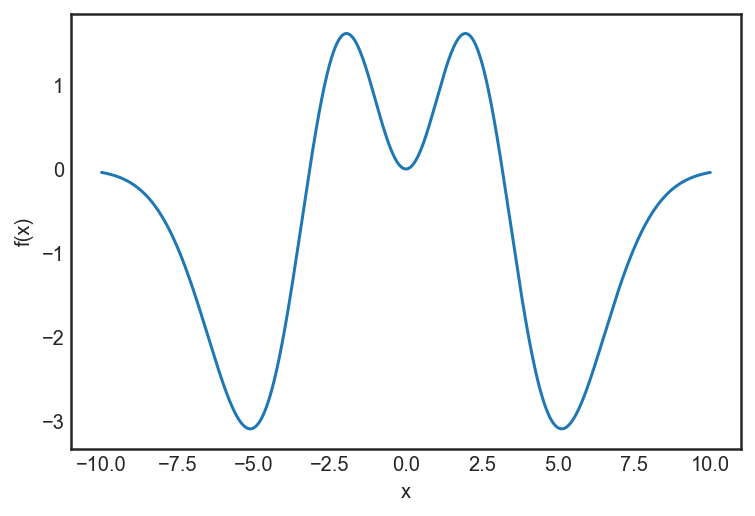

In [7]:
fig, ax = plt.subplots()
ax.set(xlabel='x', ylabel='f(x)')
ax.plot(x, f(x));

Поиск минимума в этом случае будет более сложным, поэтому будет интересно отследить, как алгоритм будет перемещаться по оси $x$. Для этого определим функцию `get_path`.  В этой лекции подробно останавливаться на описании работы этой функции мы не будем, нам лишь важно знать, что она будет записывать в список `path` координаты всех пройденных точек.

In [8]:
def get_path(xc):
    global path
    path.append(xc)

Выберем начальную точку и точность расчета `tol` и запустим процесс минимизации:

In [9]:
x0 = 2.4
path = [x0]
result = minimize(f, x0=x0, tol=1e-2, callback=get_path)
x1 = result.x
print(result)


      fun: -3.090047003364168
 hess_inv: array([[2.91066268]])
      jac: array([0.00171024])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([5.11767426])


Отобразим на графике все точки, содержащиеся в path. Начальная точка показана зеленым, конечная – красным, а все промежуточные – черным:

(-3.5, 2.0)

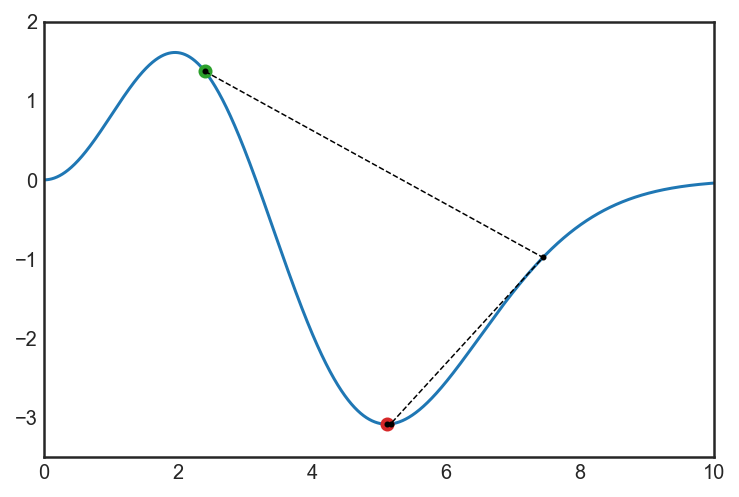

In [10]:
plt.scatter([x0], [f(x0)], color = 'tab:green')
plt.plot(path, [f(i) for i in path], '--o', color="black", lw=0.75, markersize=2)
plt.scatter([x1], [f(x1)], color = 'tab:red')
plt.plot(x, f(x), zorder = 0)
plt.xlim(0, 10)
plt.ylim(-3.5, 2)

Главный недостаток алгоритмов минимизации заключается в том, что вместо глобального минимума алгоритм может найти локальный. В нашем примере если начальная точка `x0` выбрана неудачно, алгоритм найдет лишь локальный минимум.

In [11]:
result = minimize(f, x0=1.5)
x2 = result.x
print(result)

      fun: 1.4145952559875395e-12
 hess_inv: array([[0.50122726]])
      jac: array([-2.36383401e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([-1.18936759e-06])


На следующем графике видно, как ответ зависит от задания начального значения $x_0$:

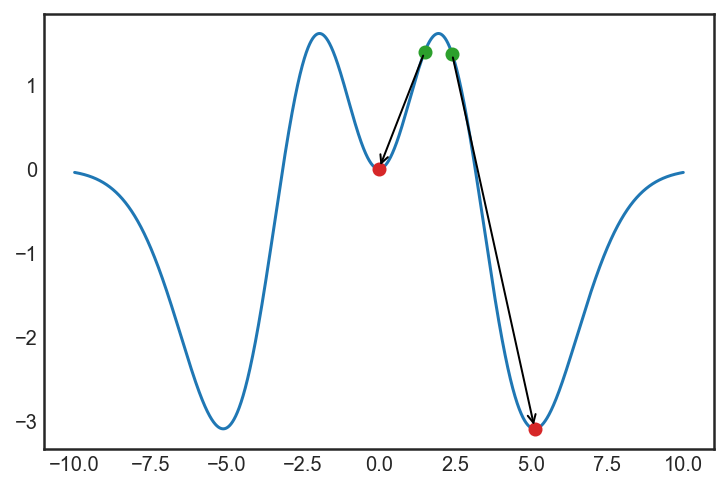

In [12]:
plt.annotate("", xytext=(2.4, f(2.4)), xy=(x1, f(x1)), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xytext=(1.5, f(1.5)), xy=(x2, f(x2)), arrowprops=dict(arrowstyle="->"))
plt.scatter([x1, x2], [f(x1), f(x2)], color = 'tab:red')
plt.scatter([2.4, 1.5], [f(2.4), f(1.5)], color = 'tab:green')
plt.plot(x, f(x), zorder=0)


Все дело в том, что аглоритм, который мы использовали - градиентный. Существуют другие алгоритмы нахождения минимума, например, алгоритм дифференциальной эволюции, который относится к классу стохастических методов. Для нашего примера он сможет различить локальный и глобальный минимумы. В качестве аргументов для него подаются функция и границы, в которых ищется точка минимума.

In [13]:
from scipy.optimize import differential_evolution

In [14]:
result = differential_evolution(f, [(x.min(),x.max())])
print(result)

     fun: array([-3.09004786])
     jac: array([2.17603714e-06])
 message: 'Optimization terminated successfully.'
    nfev: 156
     nit: 9
 success: True
       x: array([5.116674])


### Поиск максимума функции двух переменных

В качестве примера найдем максимум Гауссиана:

$$ f(x, y) = \frac{1}{2\pi\sigma_x\sigma_y} exp\left(-\left(\frac{\left(x - x_0\right)^2}{2\sigma_x^2} + \frac{\left(x - x_0\right)^2}{2\sigma_y^2}\right)\right)$$


Для поиска максимума функции достаточно просто поставить перед функцией знак минус, и задача сведется к поиску минимума.

In [18]:
def gauss(z, sigma, x0, y0):
    x, y = z
    return np.exp(-((x-x0)**2 + (y-y0)**2) / sigma**2)

neg_gauss = lambda z, sigma, x0, y0: -gauss(z, sigma, x0, y0)

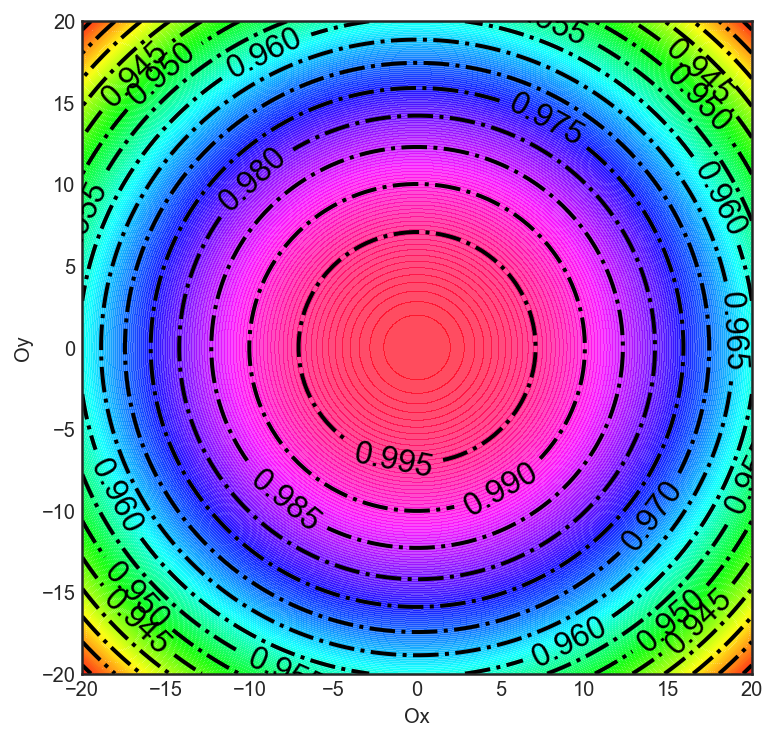

In [17]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = gauss((X, Y), 100, 0, 0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
contours = plt.contour(X, Y, Z, 15, colors="black", linewidths=2, linestyles='-.')
ax.clabel(contours, inline = True, fontsize=16)
contours = plt.contourf(X, Y, Z, 200, cmap=plt.cm.hsv, alpha=0.7)
ax.set(xlabel="Ox", ylabel="Oy");

In [ ]:
from scipy.optimize import minimize

In [20]:
a, b = 0, 0

def func(t, a, b):
    x, y = t[0], t[1]
    return (x + y)**2 - 2 * x * (y + a) - 2 * y * b + a + b

res = minimize(func, ((0, 0), ), args=(a, b))
print(" ".join(str(i) for i in res.x))

0.0 0.0


In [21]:
path = [(15, 10)]

result = minimize(neg_gauss, (15, 10), args=(100, 0, 0), callback=get_path,)
path = np.array(path)

Как мы помним, обязательными аргументами функции `minimize` являются минимизируемая функция и начальная точка: в данном случае это `neg_gauss` и (15,10). Наша функция `neg_gauss` зависит от нескольких переменных, однако минимизировать ее мы хотим только по переменной `z`, поэтому все остальные параметры (это `sigmsa, x0, y0`) нужно передать в именованный аргумент `args` в виде кортежа. Путь алгоритма к точке минимума показан звездочками.

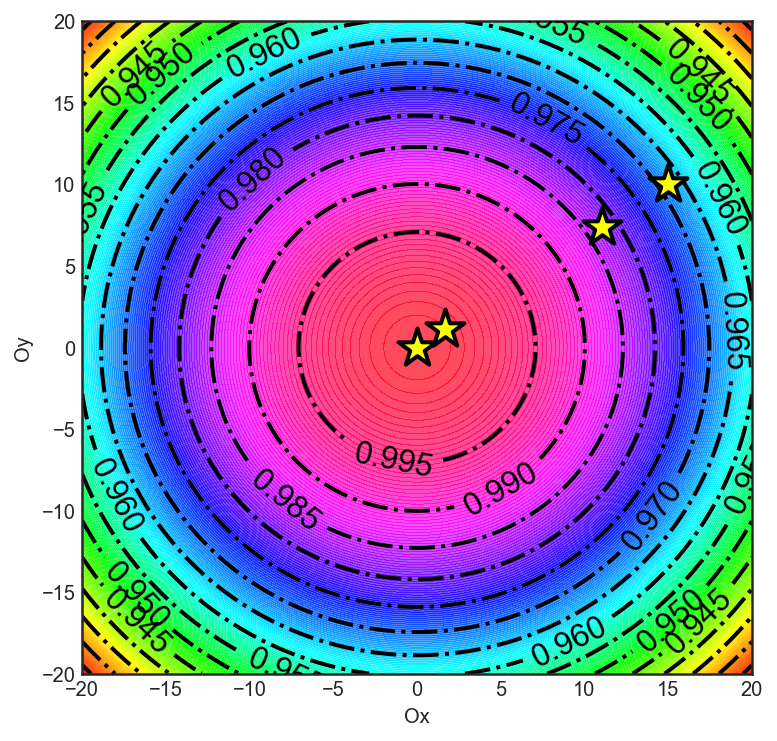

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
contours = plt.contour(X, Y, Z, 15, colors="black", linewidths=2, linestyles='-.')
ax.clabel(contours, inline = True, fontsize=16)
contours = plt.contourf(X, Y, Z, 200, cmap=plt.cm.hsv, alpha=0.7)
ax.scatter(path[:, 0], path[:, 1], s=400, c='yellow', marker='*', alpha=1, edgecolor='black', linewidth=2)
ax.set(xlabel="Ox", ylabel="Oy");

Для более сложного примера рассмотрим функцию состоящую из суммы нескольких гауссианов, с несколькими локальными минимумами.

In [23]:
def mixed(z, *args):
    return np.sum(neg_gauss(z, *params) for params in args)

In [24]:
Z = mixed((X, Y), (10, -5, -12), (7, 5, 5), (9, -5, 10))

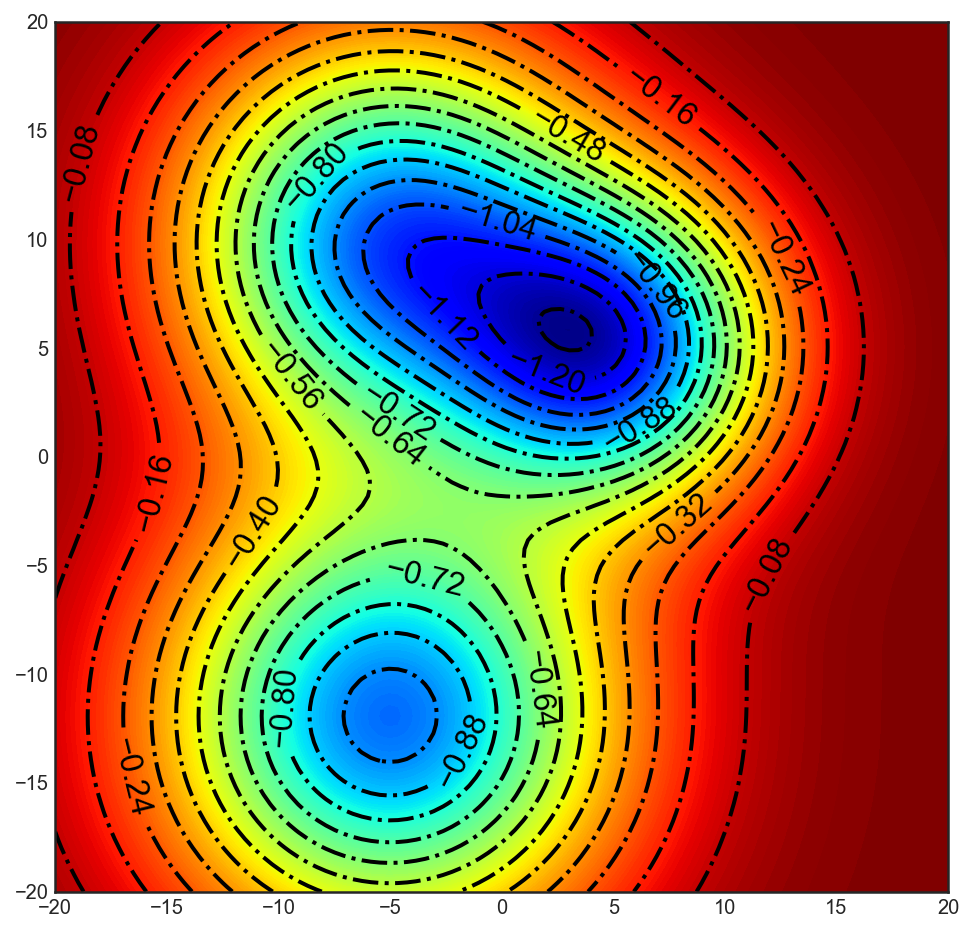

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
contours = ax.contour(X, Y, Z, 16, colors="black", linewidths=2, linestyles='-.')
ax.clabel(contours, inline=True, fontsize=16)
contours = ax.contourf(X, Y, Z, 200, cmap=plt.cm.jet)

Из вида функции `mixed` видно, что `args` должен содержать набор кортежей (или списков), каждый из которых должен содержать три переменных - значения `sigmsa, x0, y0` для каждого гауссиана. Количество таких наборов и определит число гауссианов, входящих в сумму для нашей функции. В нашем примере функция будет суммой трех гауссианов. Кроме того, для алгоритма дифференциальной эволюции мы здесь задали несколько дополнительных параметров. `init` - это набор точек, с которых стартует алгоритм (для данного алгоритма нужно задать по меньшей мере пять начальных точек), `recombination` - параметр, который находится в диапазоне от 0 до 1 и характеризует способность алгоритма выходить из локальных минимумов, `seed` - задает генерацию случайных чисел для возможности воспроизведения результатов на разных компьютерах.

Text(0.5, 1.0, 'DE')

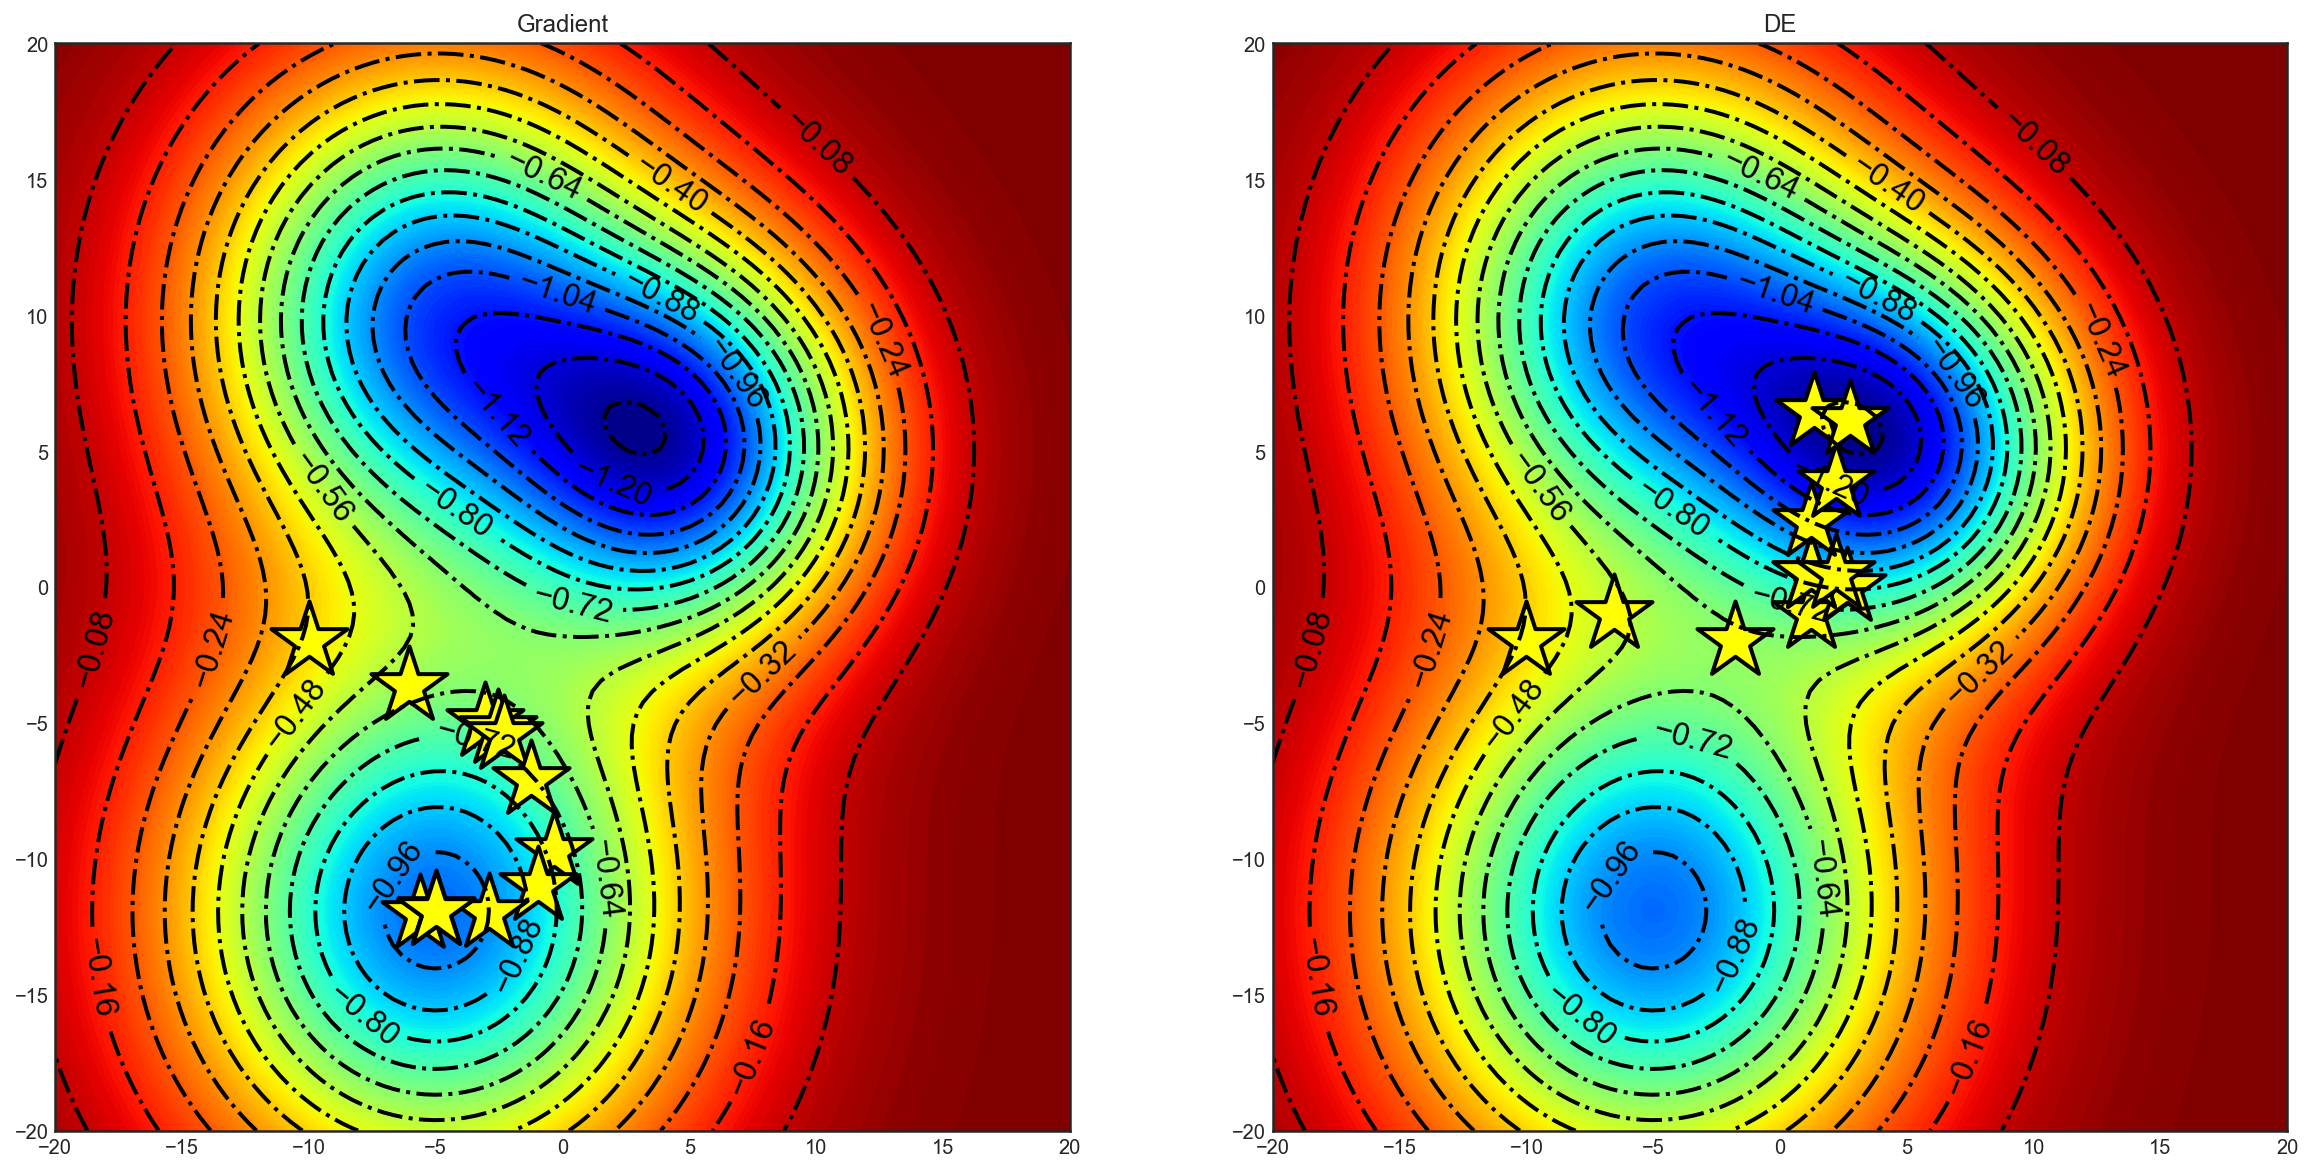

In [28]:
# Gradient method
x0 = (-10, -2)
path = [x0]
result = minimize(mixed, x0,
                  args=((10, -5, -12), (7, 5, 5), (9, -5, 10)), 
                  callback=get_path,
                 )

Z = mixed((X, Y), (10, -5, -12), (7, 5, 5), (9, -5, 10))
path = np.array(path)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
contours = ax[0].contour(X, Y, Z, 16, colors="black", linewidths=2, linestyles='-.')
ax[0].clabel(contours, inline=True, fontsize=16)
contours = ax[0].contourf(X, Y, Z, 200, cmap=plt.cm.jet)

ax[0].scatter(path[:, 0], path[:, 1], s=1600, c='yellow', 
              marker='*', 
              alpha=1, 
              edgecolor='black', 
              linewidth=2, 
              zorder=1
             )
ax[0].set_title('Gradient')


# Differential Evoluttion
path = [x0]

# Здесь нужно немного изменить функцию get_path для соответствования требованиям алгоритма диффренциальной эволюции
def get_path(xc, convergence=0):
    global path
    path.append(xc) 

result = differential_evolution(mixed, ((-20, 20), (-20, 20)), 
                                init=np.array([x0, (-9, -1), (-11, -3), (-8, 0), (-12, -4)]), 
                                args=((10, -5, -12), (7, 5, 5), (9, -5, 10)), 
                                recombination=0.15, 
                                seed=2, 
                                callback=get_path
                               )
path = np.array(path)

contours = ax[1].contour(X, Y, Z, 16, colors="black", linewidths=2, linestyles='-.')
ax[1].clabel(contours, inline=True, fontsize=16)
contours = ax[1].contourf(X, Y, Z, 200, cmap=plt.cm.jet)
ax[1].scatter(path[:, 0], path[:, 1], s=1600, c='yellow', 
              marker='*', 
              alpha=1, 
              edgecolor='black', 
              linewidth=2, 
              zorder=1
             )
ax[1].set_title('DE')

На рисунке слева видно, что алгоритм `minimize` свалился в локальный минимум, а алгоритм дифференциальной эволюции (справа на рисунке) сумел правильно найти глобальный минимум.